# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [1]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

     |████████████████████████████████| 6.7MB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 25.2MB 86kB/s eta 0:00:016
     |████████████████████████████████| 296kB 40.4MB/s eta 0:00:01


In [15]:
# SMAI Assignment 2 # Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [16]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [17]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [18]:
# Loading the dataset
# eg.
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32, 3)


In [19]:
print(X.shape)

(400, 32, 32, 3)


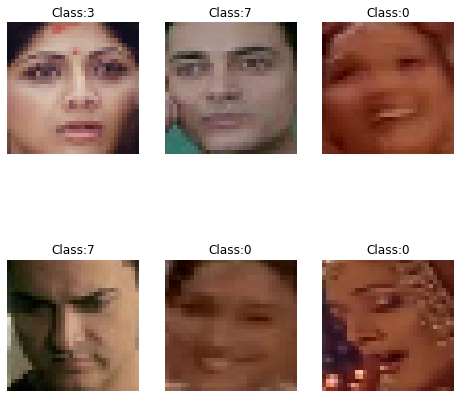

In [20]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [ ]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [21]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    return X_k

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [22]:
def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return X_k

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [23]:
def get_lda(X,y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [24]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [25]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [26]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 


___________________________

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. 

1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

From the eigen value plot, we can see that the minimum number of significant eigenvalues are 11. We use 90% of the sum of the eigenvalues.

In [91]:
# Compute your features 
# eg.
# X_3D = get_kernel_lda(X,y,3)

X_1,y_1 = load_data('./dataset/IIIT-CFW')
N_1,H_1,W_1 = X_1.shape[0:3]
C_1 = 1 if opt['is_grayscale'] else X_1.shape[3]
X_1 = X_1.reshape((N_1,H_1*W_1*C_1))
X_3D_1 = get_pca(X_1,207)

X_2,y_2 = load_data('./dataset/IMFDB')
N_2,H_2,W_2 = X_2.shape[0:3]
C_2 = 1 if opt['is_grayscale'] else X_2.shape[3]
X_2 = X_2.reshape((N_2,H_2*W_2*C_2))
X_3D_2 = get_pca(X_2,66)

X_3,y_3 = load_data('./dataset/Yale_face_database')
N_3,H_3,W_3 = X_3.shape[0:3]
C_3 = 1 if opt['is_grayscale'] else X_3.shape[3]
X_3 = X_3.reshape((N_3,H_3*W_3*C_3))
X_3D_3 = get_pca(X_3,34)

Dataset shape: (672, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


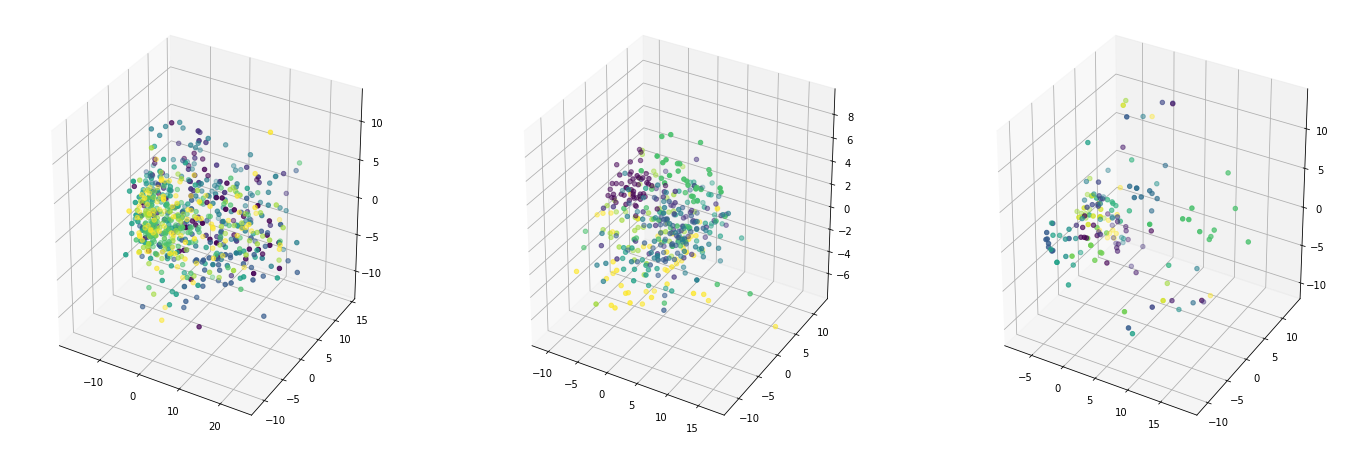

In [92]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_3D_1[:,0],X_3D_1[:,1],X_3D_1[:,2],c=y_1)

ax = fig.add_subplot(132, projection='3d')
ax.scatter(X_3D_2[:,0],X_3D_2[:,1],X_3D_2[:,2],c=y_2)

ax = fig.add_subplot(133, projection='3d')
ax.scatter(X_3D_3[:,0],X_3D_3[:,1],X_3D_3[:,2],c=y_3)


In [93]:
# Plot the eigen value spectrum 
values_1,_ = np.linalg.eig(np.cov(X_1))
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(131)
ax.scatter([i for i in range(len(values_1))],values_1)

values_2,_ = np.linalg.eig(np.cov(X_2))
ax = fig.add_subplot(132)
ax.scatter([i for i in range(len(values_2))],values_2)

values_3,_ = np.linalg.eig(np.cov(X_3))
ax = fig.add_subplot(133)
ax.scatter([i for i in range(len(values_3))],values_3)


1(c). Reconstruct  the  image  back for each case


In [94]:
def reconstruct_images(X,k,*args,**kwargs):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    reconstruct_X = pca.inverse_transform(X_k)
    
    return reconstruct_X    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


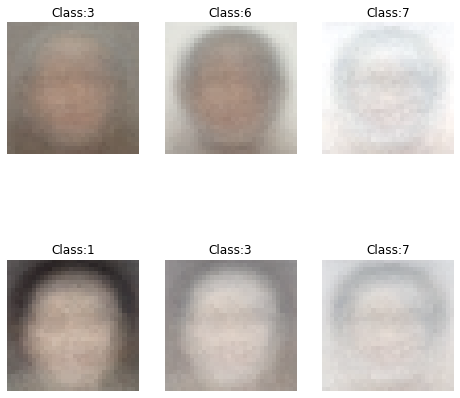

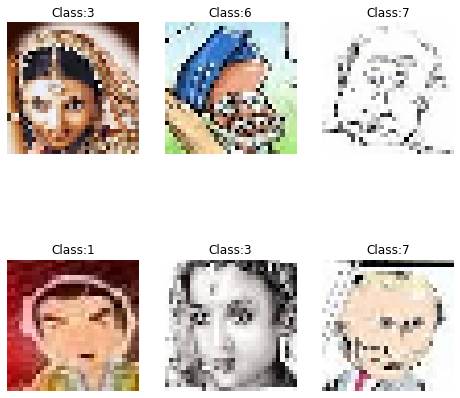

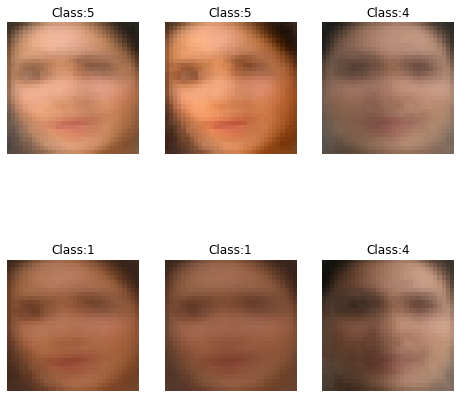

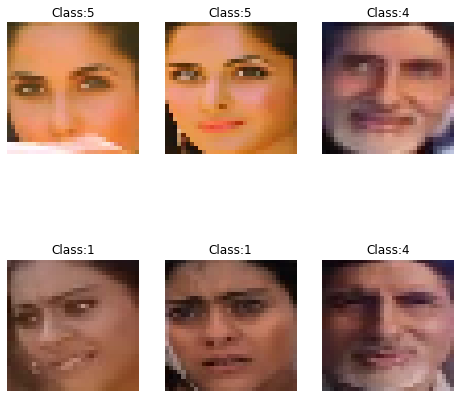

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


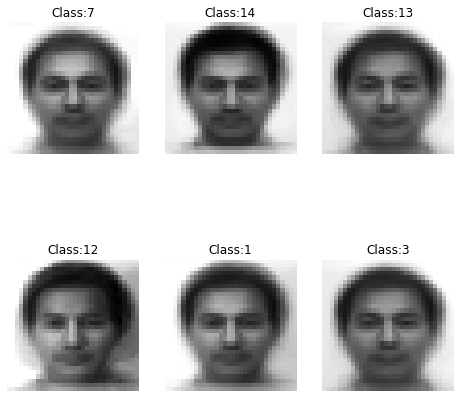

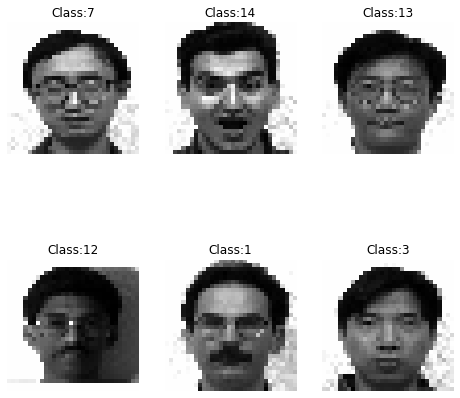

0.23416578143523897
0.12336715293427856
0.18206447468765846


In [123]:
# Display results 
X_reconstructed_1 = reconstruct_images(X_1,3)

X_reconstructed_2 = reconstruct_images(X_2,3)

X_reconstructed_3 = reconstruct_images(X_3,3)
# Display random images

ind = np.random.randint(0,y_1.shape[0],6)
disply_images(X_reconstructed_1.reshape((N_1,H_1,W_1,C_1))[ind,...],y_1[ind],row=2,col=3)
disply_images(X_1.reshape((N_1,H_1,W_1,C_1))[ind,...],y_1[ind],row=2,col=3)

ind = np.random.randint(0,y_2.shape[0],6)
disply_images(X_reconstructed_2.reshape((N_2,H_2,W_2,C_2))[ind,...],y_2[ind],row=2,col=3)
disply_images(X_2.reshape((N_2,H_2,W_2,C_2))[ind,...],y_2[ind],row=2,col=3)

ind = np.random.randint(0,y_3.shape[0],6)
disply_images(X_reconstructed_3.reshape((N_3,H_3,W_3,C_3))[ind,...],y_3[ind],row=2,col=3)
disply_images(X_3.reshape((N_3,H_3,W_3,C_3))[ind,...],y_3[ind],row=2,col=3)


# Show the reconstruction error
print(np.sqrt(np.mean((X_1 - X_reconstructed_1)**2)))
print(np.sqrt(np.mean((X_2 - X_reconstructed_2)**2)))
print(np.sqrt(np.mean((X_3 - X_reconstructed_3)**2)))

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

The person with the maximum reconstruction loss is the most difficult to represent compactly with fewer eigenvectors. This goes back to the basic derivation of the PCA where we tried to minimize reconstruction loss.

In [96]:
# code goes here
reconstruction_loss = np.sqrt(np.mean((X_1 - X_reconstructed_1)**2,axis=1))
print(reconstruction_loss.shape)
df = pd.DataFrame(reconstruction_loss)
df = df.assign(class_label=y_1)
grouped = df.groupby('class_label')
print(grouped.aggregate(np.mean))

reconstruction_loss = np.sqrt(np.mean((X_2 - X_reconstructed_2)**2,axis=1))
print(reconstruction_loss.shape)
df = pd.DataFrame(reconstruction_loss)
df = df.assign(class_label=y_2)
grouped = df.groupby('class_label')
print(grouped.aggregate(np.mean))

reconstruction_loss = np.sqrt(np.mean((X_3 - X_reconstructed_3)**2,axis=1))
print(reconstruction_loss.shape)
df = pd.DataFrame(reconstruction_loss)
df = df.assign(class_label=y_3)
grouped = df.groupby('class_label')
print(grouped.aggregate(np.mean))

(672,)
                    0
class_label          
0            0.222971
1            0.238942
2            0.198245
3            0.224615
4            0.223832
5            0.238271
6            0.247141
7            0.228823
(400,)
                    0
class_label          
0            0.085976
1            0.113470
2            0.107106
3            0.126598
4            0.138194
5            0.133583
6            0.116460
7            0.133032
(165,)
                    0
class_label          
0            0.192097
1            0.171668
2            0.182702
3            0.178547
4            0.169317
5            0.177254
6            0.179727
7            0.184212
8            0.187478
9            0.183212
10           0.193199
11           0.163692
12           0.192094
13           0.164460
14           0.192149


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [97]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

class Classifier(MLPClassifier):
    def __init__(self,*args, **kwargs):
        super(Classifier,self).__init__(*args, **kwargs)
        
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confusion_matrix(y,pred)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.fit(X_train,y_train)
        
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """

        # Create a confusion matrix
        y_pred = self.classify(X_validate)
        conf_matrix = self.confusion_matrix(y_validate,y_pred)
        
        # Calculate Validation accuracy 
        accuracy = accuracy_score(y_pred,y_validate)
      
        # Calculate precision and recall 
        precision = precision_score(y_validate,y_pred, average='macro')
        recall = recall_score(y_validate,y_pred, average='macro')
        
        # Calculate F1-score
        f1 = f1_score(y_validate,y_pred, average='macro')
        return {'confusion_matrix':conf_matrix,'recall_score':recall,'precision_score':precision,'accuracy':accuracy,'f1_score':f1}

In [103]:
# Create a train and validation split to train your classifier 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
mlp = Classifier()
mlp.train(X_train,y_train)
mlp.classify(X_test)
print(mlp.validate(X_test,y_test))

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
mlp = Classifier()
mlp.train(X_train,y_train)
mlp.classify(X_test)
print(mlp.validate(X_test,y_test))

X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
mlp = Classifier()
mlp.train(X_train,y_train)
mlp.classify(X_test)
print(mlp.validate(X_test,y_test))

/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


{'confusion_matrix': array([[ 3,  1,  0,  1,  0,  0,  0,  0],
       [ 2,  4,  1,  5,  2,  1,  0,  0],
       [ 1,  0,  9,  2,  2,  0,  1,  2],
       [ 3,  1,  2, 19,  0,  1,  0,  3],
       [ 0,  2,  2,  1, 11,  0,  1,  5],
       [ 0,  1,  0,  1,  1, 11,  1,  4],
       [ 0,  0,  2,  0,  0,  0,  8,  0],
       [ 0,  0,  3,  1,  3,  2,  0,  9]]), 'recall_score': 0.5394566373113283, 'precision_score': 0.5537747766983382, 'accuracy': 0.5481481481481482, 'f1_score': 0.5363182375058333}


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'confusion_matrix': array([[10,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  5,  0,  4,  1,  0,  0,  0],
       [ 0,  1,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 12,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 12]]), 'recall_score': 0.8796047702297702, 'precision_score': 0.8779761904761905, 'accuracy': 0.875, 'f1_score': 0.8699002631355572}
{'confusion_matrix': array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [106]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score
#IIIT-CFW

def get_red_data(dirpath):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    X_red = { 'Eigen_Face':get_pca(X,10),
              'Kernel_Face':get_kernel_pca(X,10),
              'Fischer_Face':get_lda(X,y,10),
              'Kernel_Fischer_Face':get_kernel_lda(X,y,10),
              'VGG_Face':get_vgg_features(dirpath),
              'Resnet_Face':get_resnet_features(dirpath)
            }
    data = {}
    for key in X_red:
        X_train, X_test, y_train, y_test = train_test_split(X_red[key], y, test_size=0.2, random_state=42)
        cls = Classifier()
        cls.train(X_train,y_train)
        data[key] = cls.validate(X_test,y_test)
    return data
data_IIIT_CFW = get_red_data('./dataset/IIIT-CFW')
df = pd.DataFrame(data_IIIT_CFW).transpose()
df.iloc[:,1:]

# Print the table. (You can use Pandas)


Dataset shape: (672, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components 

recall_score precision_score  accuracy  f1_score
Eigen_Face              0.452111         0.43265  0.444444   0.43259
Kernel_Face             0.440129         0.43284  0.444444  0.425573
Fischer_Face            0.955629        0.950347  0.955556  0.952436
Kernel_Fischer_Face     0.969518         0.96598  0.962963  0.966779
VGG_Face                0.626119        0.651735  0.674074  0.629921
Resnet_Face              0.98382        0.975815  0.977778  0.979284

In [104]:
data_IMFDB = get_red_data('./dataset/IMFDB')
df = pd.DataFrame(data_IMFDB).transpose()
df.iloc[:,1:]


Dataset shape: (400, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components 

recall_score precision_score accuracy  f1_score
Eigen_Face                0.7692        0.747167     0.75  0.752786
Kernel_Face             0.652416         0.60209    0.625  0.599229
Fischer_Face               0.975        0.984375   0.9875  0.977778
Kernel_Fischer_Face        0.975        0.984375   0.9875  0.977778
VGG_Face                0.911298        0.922917   0.9125  0.914296
Resnet_Face             0.948664        0.945933     0.95  0.945486

In [105]:
data_Yale = get_red_data('./dataset/Yale_face_database')
df = pd.DataFrame(data_Yale).transpose()
df.iloc[:,1:]

Dataset shape: (165, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-pack

recall_score precision_score  accuracy  f1_score
Eigen_Face               0.77381        0.732143  0.787879  0.733844
Kernel_Face             0.555556        0.522222  0.575758  0.504444
Fischer_Face                   1               1         1         1
Kernel_Fischer_Face            1               1         1         1
VGG_Face                0.483333        0.551111  0.575758  0.482222
Resnet_Face             0.964286        0.964286  0.969697  0.952381

In [101]:
# For each dataset print the confusion matrix for the best model 
print('IIIT_CFW : Resnet_Face\n',data_IIIT_CFW['Resnet_Face']['confusion_matrix'])
print('IMFDB : Kernel_Fischer_Face\n',data_IMFDB['Kernel_Fischer_Face']['confusion_matrix'])
print('Yale Face Database : Kernel_Fischer_Face\n',data_Yale['Kernel_Fischer_Face']['confusion_matrix'])

IIIT_CFW : Resnet_Face
 [[ 9  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  1]
 [ 0  0 19  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0 11  0]
 [ 0  0  0  1  1  0  0 22]]
IMFDB : Kernel_Fischer_Face
 [[10  0  0  0  0  0  0  0]
 [ 0  7  1  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 13]]
Yale Face Database : Kernel_Fischer_Face
 [[2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

Dataset shape: (672, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)


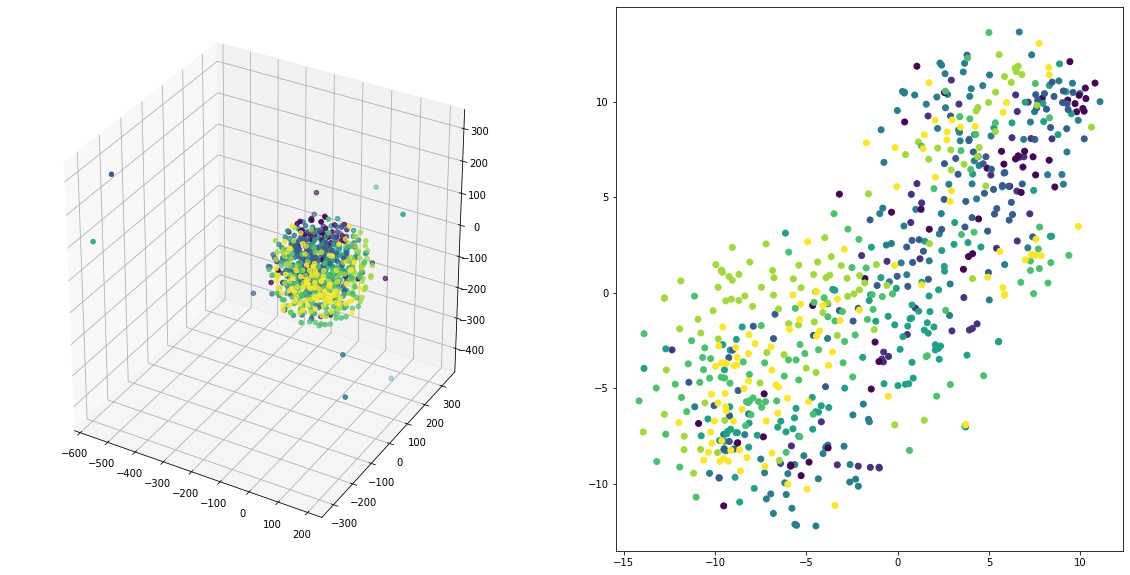

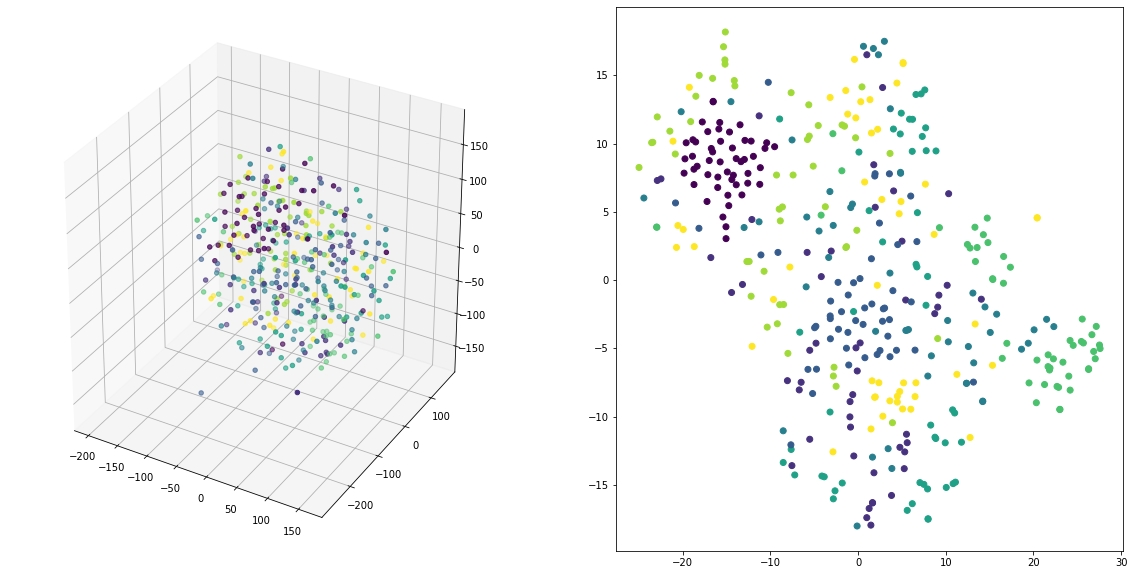

In [107]:
# Compute TSNE for different features and create a scatter plot

X_1,y_1 = load_data('./dataset/IIIT-CFW') # feature
N,H,W = X_1.shape[0:3]
C = 1 if opt['is_grayscale'] else X_1.shape[3]
X_1 = X_1.reshape((N,H*W*C))

# Compute

X_TSNE = TSNE(n_components=3).fit_transform(X_1)


# Plot the representation in 2d/3d
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_TSNE[:,0],X_TSNE[:,1],X_TSNE[:,2],c=y_1)

X_TSNE = TSNE(n_components=2).fit_transform(X_1)
ax = fig.add_subplot(122)
ax.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_1)
# Compute TSNE for different features and create a scatter plot

X_2,y_2 = load_data('./dataset/IMFDB') # feature
N,H,W = X_2.shape[0:3]
C = 1 if opt['is_grayscale'] else X_2.shape[3]
X_2 = X_2.reshape((N,H*W*C))

# Compute
X_TSNE = TSNE(n_components=3).fit_transform(X_2)

# Plot the representation in 2d/3d
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_TSNE[:,0],X_TSNE[:,1],X_TSNE[:,2],c=y_2)

X_TSNE = TSNE(n_components=2).fit_transform(X_2)

ax = fig.add_subplot(122)
ax.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_2)


Dataset shape: (165, 32, 32, 3)


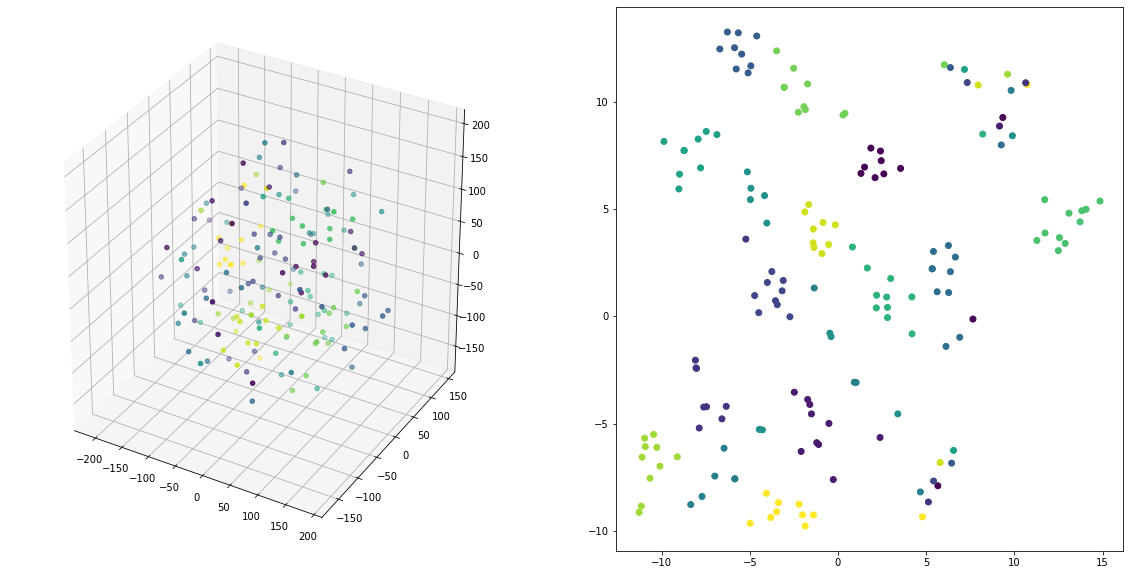

In [108]:
# Compute TSNE for different features and create a scatter plot

X_3,y_3 = load_data('./dataset/Yale_face_database') # feature
N,H,W = X_3.shape[0:3]
C = 1 if opt['is_grayscale'] else X_3.shape[3]
X_3 = X_3.reshape((N,H*W*C))

# Compute
X_TSNE_3 = TSNE(n_components=3).fit_transform(X_3)


# Plot the representation in 2d/3d
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_TSNE_3[:,0],X_TSNE_3[:,1],X_TSNE_3[:,2],c=y_3)
X_TSNE_3 = TSNE(n_components=2).fit_transform(X_3)
ax = fig.add_subplot(122)
ax.scatter(X_TSNE_3[:,0],X_TSNE_3[:,1],c=y_3)

X_comb = np.vstack((X_1,X_2,X_3))
y_comb = np.concatenate((y_1,y_2,y_3))

# Compute
X_TSNE_comb = TSNE(n_components=3).fit_transform(X_comb)


# Plot the representation in 2d/3d
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_TSNE_comb[:,0],X_TSNE_comb[:,1],X_TSNE_comb[:,2],c=y_comb)

X_TSNE_comb = TSNE(n_components=2).fit_transform(X_comb)
ax = fig.add_subplot(122)
ax.scatter(X_TSNE_comb[:,0],X_TSNE_comb[:,1],c=y_comb)

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

KNN algorithm is used to classify by finding the K nearest matches in training data and then using the label of closest matches to predict. So we project the data into lower dimensions using the above methods and then apply KNN Classification to predict the label.

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

We can use accuracy, precision, recall and F1 scores to analyze the performance. In case of KNN, accuracy is a good analysis metric.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [109]:
from sklearn.neighbors import KNeighborsClassifier

class FaceVerification(KNeighborsClassifier):
    def __init__(self,*args, **kwargs):
        super(FaceVerification,self).__init__(*args, **kwargs)
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        y_pred = self.predict(X_validate)
        verfication_results = [y_pred[i]==y_validate[i] for i in range(len(y_validate))]
        return verfication_results
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        y_pred = self.predict(X_validate)
        # Calculate Validation accuracy 
        accuracy = accuracy_score(y_pred,y_validate)
      
        # Calculate precision and recall 
        precision = precision_score(y_validate,y_pred, average='macro')
        recall = recall_score(y_validate,y_pred, average='macro')
        
        # Calculate F1-score
        f1 = f1_score(y_validate,y_pred, average='macro')
        return {'recall_score':recall,'precision_score':precision,'accuracy':accuracy,'f1_score':f1}

In [110]:
# Create a train and validation split and show your results 
def get_red_data(dirpath):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    X_red = { 'Eigen_Face':get_pca(X,10),
              'Kernel_Face':get_kernel_pca(X,10),
              'Fischer_Face':get_lda(X,y,10),
              'Kernel_Fischer_Face':get_kernel_lda(X,y,10),
              'VGG_Face':get_vgg_features(dirpath),
              'Resnet_Face':get_resnet_features(dirpath)
            }
    data = {}
    for key in X_red:
        X_train, X_test, y_train, y_test = train_test_split(X_red[key], y, test_size=0.2, random_state=42)
        cls = FaceVerification()
        cls.train(X_train,y_train)
        data[key] = cls.validate(X_test,y_test)
    return data
data_IIIT_CFW = get_red_data('./dataset/IIIT-CFW')
df = pd.DataFrame(data_IIIT_CFW).transpose()
print(df)
data_IMFDB = get_red_data('./dataset/IMFDB')
df = pd.DataFrame(data_IMFDB).transpose()
print(df)
data_Yale = get_red_data('./dataset/Yale_face_database')
df = pd.DataFrame(data_Yale).transpose()
print(df)

Dataset shape: (672, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components 

                     recall_score  precision_score  accuracy  f1_score
Eigen_Face               0.435675         0.412554  0.392593  0.394082
Kernel_Face              0.435060         0.421099  0.414815  0.410049
Fischer_Face             0.955629         0.953480  0.955556  0.953621
Kernel_Fischer_Face      0.955629         0.953480  0.955556  0.953621
VGG_Face                 0.647482         0.673355  0.681481  0.648618
Resnet_Face              0.972456         0.973280  0.970370  0.972103
Dataset shape: (400, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components 

                     recall_score  precision_score  accuracy  f1_score
Eigen_Face               0.625187         0.605884    0.5875  0.570322
Kernel_Face              0.625187         0.605884    0.5875  0.570322
Fischer_Face             0.959375         0.959375    0.9750  0.958333
Kernel_Fischer_Face      0.959375         0.959375    0.9750  0.958333
VGG_Face                 0.873836         0.879132    0.8875  0.874352
Resnet_Face              0.939048         0.938636    0.9375  0.935293
Dataset shape: (165, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


                     recall_score  precision_score  accuracy  f1_score
Eigen_Face               0.714286         0.690476  0.696970  0.661224
Kernel_Face              0.678571         0.678571  0.666667  0.639796
Fischer_Face             1.000000         1.000000  1.000000  1.000000
Kernel_Fischer_Face      1.000000         1.000000  1.000000  1.000000
VGG_Face                 0.494444         0.413333  0.515152  0.429654
Resnet_Face              1.000000         1.000000  1.000000  1.000000


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

In [111]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision
def get_red_data(dirpath):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    X_red = { 'Eigen_Face':get_pca(X,10),
              'Kernel_Face':get_kernel_pca(X,10),
              'Fischer_Face':get_lda(X,y,10),
              'Kernel_Fischer_Face':get_kernel_lda(X,y,10),
              'VGG_Face':get_vgg_features(dirpath),
              'Resnet_Face':get_resnet_features(dirpath)
            }
    data = {}
    for key in X_red:
        X_train, X_test, y_train, y_test = train_test_split(X_red[key], y, test_size=0.2, random_state=42)
        cls = FaceVerification(n_neighbors=3)
        cls.train(X_train,y_train)
        data[key] = cls.validate(X_test,y_test)
    return data
data_IIIT_CFW = get_red_data('./dataset/IIIT-CFW')
df = pd.DataFrame(data_IIIT_CFW).transpose()
print(df)
data_IMFDB = get_red_data('./dataset/IMFDB')
df = pd.DataFrame(data_IMFDB).transpose()
print(df)
data_Yale = get_red_data('./dataset/Yale_face_database')
df = pd.DataFrame(data_Yale).transpose()
print(df)
# Print the table. (You can use Pandas)

Dataset shape: (672, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components 

                     recall_score  precision_score  accuracy  f1_score
Eigen_Face               0.408131         0.388423  0.370370  0.366722
Kernel_Face              0.378306         0.348326  0.333333  0.334339
Fischer_Face             0.949050         0.944389  0.948148  0.944792
Kernel_Fischer_Face      0.949050         0.944389  0.948148  0.944792
VGG_Face                 0.662720         0.663551  0.674074  0.654479
Resnet_Face              0.983820         0.975815  0.977778  0.979284
Dataset shape: (400, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3072, 8 - 1) = 7 components.
  ChangedBehaviorWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components 

                     recall_score  precision_score  accuracy  f1_score
Eigen_Face               0.658254         0.661379    0.6375  0.634721
Kernel_Face              0.621166         0.619729    0.6000  0.597403
Fischer_Face             0.959375         0.973011    0.9750  0.963492
Kernel_Fischer_Face      0.959375         0.973011    0.9750  0.963492
VGG_Face                 0.903056         0.908780    0.9125  0.903766
Resnet_Face              0.956906         0.954545    0.9500  0.949691
Dataset shape: (165, 32, 32, 3)


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classificatio

                     recall_score  precision_score  accuracy  f1_score
Eigen_Face               0.678571         0.683333  0.666667  0.644898
Kernel_Face              0.714286         0.695238  0.696970  0.666327
Fischer_Face             1.000000         1.000000  1.000000  1.000000
Kernel_Fischer_Face      1.000000         1.000000  1.000000  1.000000
VGG_Face                 0.361111         0.354444  0.454545  0.321905
Resnet_Face              1.000000         1.000000  1.000000  1.000000


/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', 

### Extension / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

In [112]:
# Load data
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(data_home='./dataset',min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]



In [113]:
# Define your features
n_components = 3
X = LDA(n_components=n_components).fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [114]:
# Create your classifier
class CustomClassifier(MLPClassifier):
    def __init__(self,*args, **kwargs):
        super(CustomClassifier,self).__init__(*args, **kwargs)
    
    def classify(self,X):
        return self.predict(X)
    
    def train(self, X_train, y_train):
        self.fit(X_train,y_train)
        
    def validate(self, X_validate, y_validate):
        # Create a confusion matrix
        y_pred = self.classify(X_validate)
        conf_matrix = confusion_matrix(y_validate,y_pred)
        
        # Calculate Validation accuracy 
        accuracy = accuracy_score(y_pred,y_validate)
      
        # Calculate precision and recall 
        precision = precision_score(y_validate,y_pred, average='macro')
        recall = recall_score(y_validate,y_pred, average='macro')
        
        # Calculate F1-score
        f1 = f1_score(y_validate,y_pred, average='macro')
        return {'confusion_matrix':conf_matrix,'recall_score':recall,'precision_score':precision,'accuracy':accuracy,'f1_score':f1}
        
# Validate your classifier
mlp = CustomClassifier()
mlp.train(X_train,y_train)
mlp.classify(X_test)
mlp.validate(X_test,y_test)

{'confusion_matrix': array([[ 13,   0,   0,   0,   0,   0,   0],
        [  0,  60,   0,   0,   0,   0,   0],
        [  0,   0,  27,   0,   0,   0,   0],
        [  0,   0,   0, 146,   0,   0,   0],
        [  0,   0,   0,   0,  25,   0,   0],
        [  0,   0,   0,   0,   0,  15,   0],
        [  0,   0,   0,   0,   0,   0,  36]]),
 'recall_score': 1.0,
 'precision_score': 1.0,
 'accuracy': 1.0,
 'f1_score': 1.0}

In [115]:
X_red = X
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_red[:,0],X_red[:,1],X_red[:,2],c=y)
ax = fig.add_subplot(122)
ax.scatter(X_red[:,0],X_red[:,1],c=y)

In [116]:
# Show quantitative results such as examples of correct prediction and wrong prediction
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(lfw_people.target_names[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
X = lfw_people.data
ind = np.random.randint(0,y.shape[0],12)
plot_gallery(X[ind,...],y[ind], h,w)

In [121]:
from sklearn.model_selection import KFold

X = lfw_people.data
X = LDA(n_components=n_components).fit_transform(X,y)

accuracy = []
precision = []
recall = []
f1 = []
for train_index, test_index in KFold(n_splits=10).split(X):
    X_train, X_test = X[train_index], X[test_index]    
    y_train, y_test = y[train_index], y[test_index]
    mlp = CustomClassifier()
    mlp.train(X_train,y_train)
    mlp.classify(X_test)
    validation = mlp.validate(X_test,y_test)
    accuracy.append(validation['accuracy'])    
    precision.append(validation['precision_score'])
    recall.append(validation['recall_score'])
    f1.append(validation['f1_score'])
accuracy = np.mean(accuracy)
precision = np.mean(precision)
recall = np.mean(recall)
f1 = np.mean(f1)
print(accuracy,precision,recall,f1)

/home/masterg/anaconda3/envs/Assignment2/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


1.0 1.0 1.0 1.0
